C:\Users\monah\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: RuntimeWarning: overflow encountered in exp


Epoch nr 1 of 100
Accuracy test:  0.497008547008547
Accuracy train:  0.5377289377289377
Epoch nr 2 of 100
Accuracy test:  0.49948717948717947
Accuracy train:  0.5408791208791209
Epoch nr 3 of 100
Accuracy test:  0.5034188034188034
Accuracy train:  0.5448351648351648
Epoch nr 4 of 100
Accuracy test:  0.504017094017094
Accuracy train:  0.5468864468864469
Epoch nr 5 of 100
Accuracy test:  0.5061538461538462
Accuracy train:  0.5535531135531135
Epoch nr 6 of 100
Accuracy test:  0.504017094017094
Accuracy train:  0.5547619047619048
Epoch nr 7 of 100
Accuracy test:  0.5007692307692307
Accuracy train:  0.5516117216117216
Epoch nr 8 of 100
Accuracy test:  0.5045299145299146
Accuracy train:  0.5540659340659341
Epoch nr 9 of 100
Accuracy test:  0.5025641025641026
Accuracy train:  0.5539194139194139
Epoch nr 10 of 100
Accuracy test:  0.4996581196581197
Accuracy train:  0.5551282051282052
Epoch nr 11 of 100
Accuracy test:  0.49974358974358973
Accuracy train:  0.5541391941391941
Epoch nr 12 of 100
A

Accuracy test:  0.5027350427350428
Accuracy train:  0.568937728937729
Epoch nr 93 of 100
Accuracy test:  0.49846153846153846
Accuracy train:  0.5678754578754579
Epoch nr 94 of 100
Accuracy test:  0.4976923076923077
Accuracy train:  0.5674358974358974
Epoch nr 95 of 100
Accuracy test:  0.497008547008547
Accuracy train:  0.5676923076923077
Epoch nr 96 of 100
Accuracy test:  0.497008547008547
Accuracy train:  0.5727106227106227
Epoch nr 97 of 100
Accuracy test:  0.49675213675213675
Accuracy train:  0.5668131868131868
Epoch nr 98 of 100
Accuracy test:  0.5001709401709402
Accuracy train:  0.5702564102564103
Epoch nr 99 of 100
Accuracy test:  0.5005128205128205
Accuracy train:  0.5701098901098901
Epoch nr 100 of 100
Accuracy test:  0.4965811965811966
Accuracy train:  0.5667399267399268


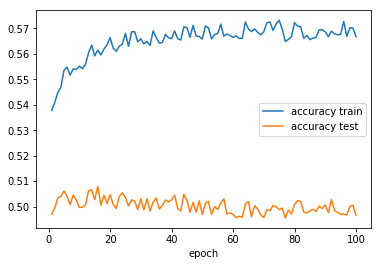

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import copy
import time
from IPython.display import display
from math import log, exp
from numba import jit
from sklearn import datasets
from sklearn.model_selection import train_test_split
#"""
#    Logistic regression
#"""
%matplotlib inline
#sns.set(color_codes=True)
class LogisticRegression:
    def __init__(self, X_train, Y_train, X_test, Y_test):
        np.random.seed(55)
        self.weights = None
        self.X_train = X_train
        self.Y_train = Y_train.reshape(len(Y_train), 1)
        self.X_test = X_test
        self.Y_test = Y_test.reshape(len(Y_test), 1)

        self.historytrain = []
        self.historytest = []

        self.target_epochs = 500
        self.target_max_iter = 100
        
    def f(x, w):
        return 1/(1 + exp(-x.dot(w)))

    def costFunction(X, labels, w):
        """
        :param X: (nx1600)
        :param labels: y (nx1)
        :param w: omega, weights (1600x1)
        :return:
        """
        n, p = np.shape(X)
        C = 0
        for i in range(n):
            C += -labels[i]*log(f(X[i, :].dot(w))) - (1-labels[i])*log(1 - f(X[i, :].dot(w)))

        return C

    def fit_standard(self, learning_rate=0.1): #=0.01):
        # Initialize weights
        max_iter = self.target_max_iter
        self.weights = np.random.randn(np.shape(self.X_train)[1], 1)

        for i in range(max_iter):
            # Compute probabilities
            z = np.dot(self.X_train, self.weights)
            pred = self.sigmoid(z)

            # Compute gradient, note division by data size
            gradient = self.X_train.T.dot((pred-self.Y_train))

            #Update weights
            self.weights -= learning_rate * gradient

            # Print progress
            if (i+1) % 100 == 0:
                print('{}% done'.format(100*(i+1)/max_iter))
            #print('Accuracy train: ', self.accuracy(self.X_train, self.Y_train))
            #print('Accuracy test: ', self.accuracy(self.X_test, self.Y_test))     
            
            tmpEpoch = i + 1
            tmpAccTrain = self.accuracy(self.X_train, self.Y_train)
            tmpAccTest =  self.accuracy(self.X_test, self.Y_test)
            
            #self.history.append((tmpEpoch, tmpAcc)) 

            self.historytrain.append((tmpEpoch, tmpAccTrain)) 
            self.historytest.append((tmpEpoch, tmpAccTest)) 
                                        
            #print('Epoch nr {0} of {1}'.format(tmpEpoch, n_epochs))
            print('Accuracy train: ', tmpAccTrain)
            print('Accuracy test: ', tmpAccTest)

            
    def fit_stochastic(self, t0=50, t1=500):
        n_epochs = self.target_epochs
        nr_data_points = np.shape(self.Y_train)[0]  # Data points
        M = nr_data_points

        # initiate weights
        self.weights = np.ones([np.shape(self.X_train)[1], 1])

        for epoch in range(n_epochs):
            for i in range(M):
                random_index = np.random.randint(M)
                X_i = self.X_train[random_index:random_index+1, :]
                Y_i = self.Y_train[random_index:random_index+1, :]

                # Calculate gradient and update weights
                z = np.dot(X_i, self.weights)
                pred = self.sigmoid(z)
                gradient = X_i.T.dot((pred-Y_i))
                eta = t0/(epoch*M+i + t1)
                self.weights -= eta*gradient
           
            tmpEpoch = epoch + 1
            tmpAccTrain = self.accuracy(self.X_train, self.Y_train)
            tmpAccTest =  self.accuracy(self.X_test, self.Y_test)
            
            
            self.historytrain.append((tmpEpoch, tmpAccTrain)) 
            self.historytest.append((tmpEpoch, tmpAccTest)) 

            print('Epoch nr {0} of {1}'.format(tmpEpoch, n_epochs))
            print('Accuracy test: ', tmpAccTest)
            print('Accuracy train: ', tmpAccTrain)       

    def sigmoid(self, z):
        # Sigmoid function
        return 1 / (1 + np.exp(-z))

    def getWeights(self):
        return self.weights

    def loss_function(self, pred, Y):
        # Compute loss function (normalized)
        return (-Y * np.log(pred) - (1 - Y) * np.log(1 - pred)).mean()

    def predict_threshold(self, X, threshold=0.5):
        # Predict
        return self.sigmoid(np.dot(X, self.weights)) >= threshold

    def accuracy(self, X=None, Y=None):
        if X is None:
            X = self.X_test
        if Y is None:
            Y = self.Y_test
        # Compute accuracy using test data

        I = self.predict_threshold(X) == Y
        return np.sum(I)/np.shape(X)[0]

if __name__ == '__main__':

    # data contains 30% of data set with only ordered and disordered states  
    data = np.load('test_set.npy')
    X = data[:, 0:1600]
    Y = data[:, -1] 
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

    logreg = LogisticRegression(X_train, Y_train, X_test, Y_test)

    #logreg.fit_standard()
    logreg.target_epochs = 100
    logreg.fit_stochastic()
           
    df1 = pd.DataFrame(logreg.historytrain, columns=['epoch', 'accuracy train'])
    df2 = pd.DataFrame(logreg.historytest, columns=['epoch', 'accuracy test'])

    ax = df1.plot(x='epoch', y='accuracy train')
    df2.plot(ax=ax, x='epoch', y='accuracy test')